In [1]:
import pandas as pd
import numpy as np

In [18]:
pr_dir = 'CSVFile/Price/Korea/Stocks'
map_dir = 'CSVFile/Map/Korea/TimeSeries'

close_pr = pd.read_csv(f"{pr_dir}/KOSPI_FROM_1998_close.csv", index_col='D A T E', parse_dates=True)

In [19]:
market_cap = pd.read_csv(f"{map_dir}/MARKET_CAP_CLASS_KSE.csv", index_col='D A T E', parse_dates=True)
market_cap

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
D A T E,,,,,,,,,,,,,,,,,,,,,
1997-12-27,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-03,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-09,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-10,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-12,1.0,3,NaN,NaN,2,2,2,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
kspi_rt = close_pr.pct_change().dropna(axis=0, how='all').fillna(-1)


In [71]:
kspi_lar_rt = kspi_rt[market_cap == 1].mean(axis = 1, skipna=True).dropna()
kspi_mid_rt = kspi_rt[market_cap == 2].mean(axis = 1, skipna=True).dropna()
kspi_sm_rt = kspi_rt[market_cap == 3].mean(axis = 1, skipna=True).dropna()

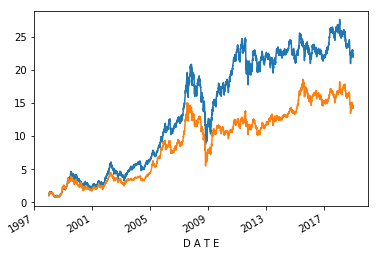

In [72]:
(kspi_lar_rt.sub(-1)).cumprod().plot()
(kspi_mid_rt.sub(-1)).cumprod().plot()

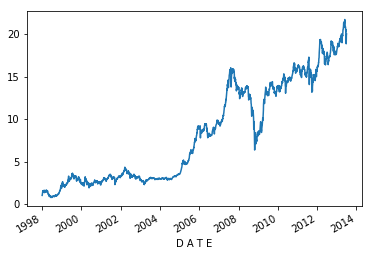

In [78]:
(kspi_sm_rt.loc[:'2013-07-01'].sub(-1)).cumprod().plot()

In [ ]:
(kspi_lar_rt.sub(-1)).rolling(30).apply(np.std, raw = True).plot()
(kspi_mid_rt.sub(-1)).rolling(30).apply(np.std, raw = True).plot()